<a href="https://colab.research.google.com/github/jajinkya/Macroeconomic-factors-influencing-emission-of-Carbon-Dioxide/blob/main/C02_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Retrieval and Basic Operations

In [ ]:
cd "/content/drive/My Drive/Global Warming/co2_prediction"

/content/drive/My Drive/Global Warming/co2_prediction


In [ ]:
#import required library
import pandas as pd  
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
root_folder = "/content/drive/My Drive/Global Warming/co2_prediction/"

def read_merge_csv(root_folder, year="2014"):
  dfs=[]

  for subdir, dir, files in os.walk(root_folder): 
    for file in files:
      filename = file.split(".")[0]            # prepare name for column
      df = pd.read_csv(root_folder+str(file))
      df.columns.values[0] = "geo"

      # considering only csv's having more than 50 countries

      if year in df.columns and df.shape[0]>50:
        df = df[["geo", year]]
        df.columns = ["geo", filename]
        dfs.append(df)

  # merge all files using key geo

  master_df = dfs[0]

  for i in range(len(dfs)-1):
    master_df = pd.merge(master_df, dfs[i+1], how="inner", 
                         left_on="geo",right_on="geo")

  return master_df

In [ ]:
emission = read_merge_csv(root_folder)
emission.head()

,geo,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
0,Algeria,3.72,13500,0.82,42.3,0.00458,1360.0,0.452,1640,145000.0,0.000787,0.302,0.319,0.0301,38900000
1,Argentina,4.75,18800,10.00,24.3,0.03460,3050.0,0.729,3290,204000.0,0.114000,0.144,0.140,5.5000,42600000
2,Australia,15.40,43400,16.20,25.4,1.82000,10100.0,2.050,10500,361000.0,0.878000,0.210,0.215,2.3700,23600000
3,Austria,6.80,44100,46.90,25.4,0.34700,8360.0,1.440,7540,58700.0,0.219000,0.534,0.501,13.2000,8620000
4,Azerbaijan,3.94,16700,13.50,53.6,0.00017,2200.0,0.468,2600,37500.0,NaN,0.433,0.262,0.5720,9510000


In [ ]:
emission.shape

(61, 15)

In [ ]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   geo                                                    61 non-null     object 
 1   co2_emissions_tonnes_per_person                        61 non-null     float64
 2   income_per_person_gdppercapita_ppp_inflation_adjusted  61 non-null     int64  
 3   forest_coverage_percent                                61 non-null     float64
 4   industry_percent_of_gdp                                61 non-null     float64
 5   coal_consumption_per_cap                               61 non-null     float64
 6   electricity_use_per_person                             61 non-null     float64
 7   oil_consumption_per_cap                                61 non-null     float64
 8   electricity_generation_per_person                   

Most of the columns don't have any missing values except `market_value_of_listed_companies_percent_of_gdp ` and `eg_use_comm_cl_zs` which is 16 and 2 respectively. 

In [ ]:
#countries name which has missing values for market_value_of_listed_companies_percent_of_gdp 
country = emission[['geo']][emission['market_value_of_listed_companies_percent_of_gdp'].isnull()]
country

,geo
4,Azerbaijan
5,Bangladesh
6,Belarus
9,Bulgaria
14,Czech Republic
15,Denmark
16,Ecuador
18,Finland
28,Italy
31,Kuwait


In [ ]:
# count of countries which don't have missing values for market_value_of_listed_companies_percent_of_gdp 
emission[['geo','co2_emissions_tonnes_per_person']][~emission['market_value_of_listed_companies_percent_of_gdp'].isnull()].shape

(45, 2)

Handling of Missing Value

As our size of data is already small we can't drop the rows of which any one of the feature has missing values. So we need to choose suitable imputation method to fill those missing values. And for that we can use [`sklearn.impute()`](https://scikit-learn.org/stable/modules/impute.html#impute) method. In this we are using `IterativeImputer` method to fill missing values. 



In [ ]:
# import required imputation library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor # model to impute the values

In [ ]:
imputing_data = emission.drop(['geo','co2_emissions_tonnes_per_person'], axis=1,) 
kn_reg = KNeighborsRegressor(weights='distance') # model instatiation
imputer = IterativeImputer(estimator= kn_reg, missing_values= np.nan, random_state=0) # instantiation of imputer 
imputed_data = pd.DataFrame(imputer.fit_transform(imputing_data), columns= imputing_data.columns)
imputed_data.head()

,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
0,13500.0,0.82,42.3,0.00458,1360.0,0.452,1640.0,145000.0,0.000787,0.302,0.319,0.0301,38900000.0
1,18800.0,10.00,24.3,0.03460,3050.0,0.729,3290.0,204000.0,0.114000,0.144,0.140,5.5000,42600000.0
2,43400.0,16.20,25.4,1.82000,10100.0,2.050,10500.0,361000.0,0.878000,0.210,0.215,2.3700,23600000.0
3,44100.0,46.90,25.4,0.34700,8360.0,1.440,7540.0,58700.0,0.219000,0.534,0.501,13.2000,8620000.0
4,16700.0,13.50,53.6,0.00017,2200.0,0.468,2600.0,37500.0,0.269851,0.433,0.262,0.5720,9510000.0


In [ ]:
imputed_data.isnull().sum()

income_per_person_gdppercapita_ppp_inflation_adjusted    0
forest_coverage_percent                                  0
industry_percent_of_gdp                                  0
coal_consumption_per_cap                                 0
electricity_use_per_person                               0
oil_consumption_per_cap                                  0
electricity_generation_per_person                        0
yearly_co2_emissions_1000_tonnes                         0
market_value_of_listed_companies_percent_of_gdp          0
exports_percent_of_gdp                                   0
imports_percent_of_gdp                                   0
eg_use_comm_cl_zs                                        0
population_total                                         0
dtype: int64

In [ ]:
# add the imputed column to original dataset
emission[["market_value_of_listed_companies_percent_of_gdp", "eg_use_comm_cl_zs"]] = imputed_data[["market_value_of_listed_companies_percent_of_gdp", "eg_use_comm_cl_zs"]]
emission.head()

,geo,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
0,Algeria,3.72,13500,0.82,42.3,0.00458,1360.0,0.452,1640,145000.0,0.000787,0.302,0.319,0.0301,38900000
1,Argentina,4.75,18800,10.00,24.3,0.03460,3050.0,0.729,3290,204000.0,0.114000,0.144,0.140,5.5000,42600000
2,Australia,15.40,43400,16.20,25.4,1.82000,10100.0,2.050,10500,361000.0,0.878000,0.210,0.215,2.3700,23600000
3,Austria,6.80,44100,46.90,25.4,0.34700,8360.0,1.440,7540,58700.0,0.219000,0.534,0.501,13.2000,8620000
4,Azerbaijan,3.94,16700,13.50,53.6,0.00017,2200.0,0.468,2600,37500.0,0.269851,0.433,0.262,0.5720,9510000


In [ ]:
emission.isnull().sum()

geo                                                      0
co2_emissions_tonnes_per_person                          0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
forest_coverage_percent                                  0
industry_percent_of_gdp                                  0
coal_consumption_per_cap                                 0
electricity_use_per_person                               0
oil_consumption_per_cap                                  0
electricity_generation_per_person                        0
yearly_co2_emissions_1000_tonnes                         0
market_value_of_listed_companies_percent_of_gdp          0
exports_percent_of_gdp                                   0
imports_percent_of_gdp                                   0
eg_use_comm_cl_zs                                        0
population_total                                         0
dtype: int64

In [ ]:
#fill the imputed values to emission dataset
emission.loc[country.index,['geo','market_value_of_listed_companies_percent_of_gdp', "eg_use_comm_cl_zs"]]

,geo,market_value_of_listed_companies_percent_of_gdp,eg_use_comm_cl_zs
4,Azerbaijan,0.269851,0.572000
5,Bangladesh,0.366450,0.153000
6,Belarus,0.466169,0.053900
9,Bulgaria,1.123161,25.800000
14,Czech Republic,0.283916,20.800000
15,Denmark,1.684340,9.890000
16,Ecuador,0.618315,6.210000
18,Finland,1.764863,23.200000
28,Italy,1.208928,7.060000
31,Kuwait,0.788394,0.000000


### Exploratory Data Analysis

In [ ]:
emission.head() # overview of data

,geo,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
0,Algeria,3.72,13500,0.82,42.3,0.00458,1360.0,0.452,1640,145000.0,0.000787,0.302,0.319,0.0301,38900000
1,Argentina,4.75,18800,10.00,24.3,0.03460,3050.0,0.729,3290,204000.0,0.114000,0.144,0.140,5.5000,42600000
2,Australia,15.40,43400,16.20,25.4,1.82000,10100.0,2.050,10500,361000.0,0.878000,0.210,0.215,2.3700,23600000
3,Austria,6.80,44100,46.90,25.4,0.34700,8360.0,1.440,7540,58700.0,0.219000,0.534,0.501,13.2000,8620000
4,Azerbaijan,3.94,16700,13.50,53.6,0.00017,2200.0,0.468,2600,37500.0,0.269851,0.433,0.262,0.5720,9510000


#### Univariate Analysis

##### Heatmap  
To see how multiple features are correlated with each other.

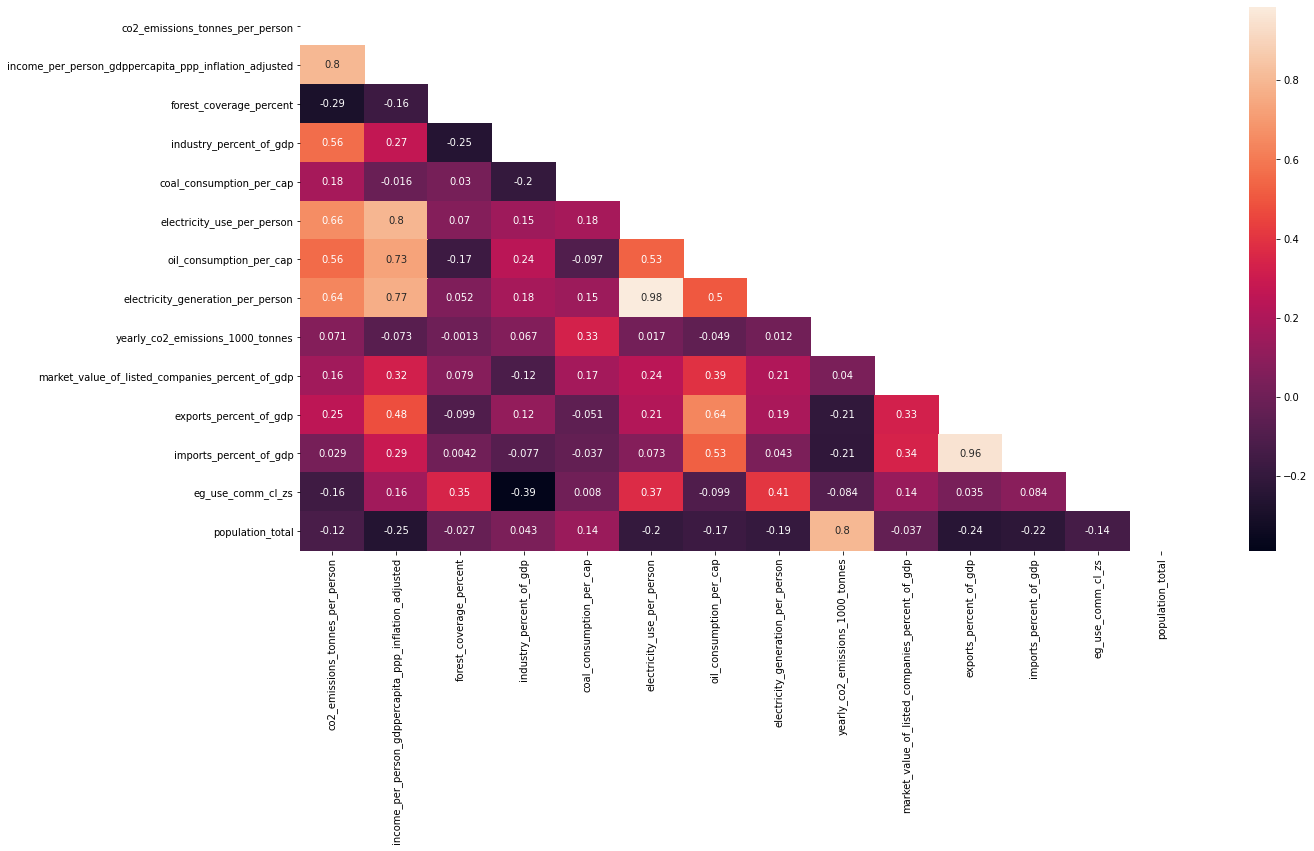

In [ ]:
plt.figure(figsize=(20,10))
matrix = np.triu(emission.corr())
sns.heatmap(emission.corr(), annot=True,mask= matrix)


##### Violin Plot

In [ ]:
# function to plot violin plots
def violin_plot(column:'list', dataframe:'dataframe'):
    plt.figure(figsize=(16,10))
    for index, val in enumerate(column):
        plt.subplot(5,3,index+1)
        sns.violinplot(dataframe[val], inner='quartile',data = dataframe)
        
    plt.tight_layout()
    return plt.show()
            

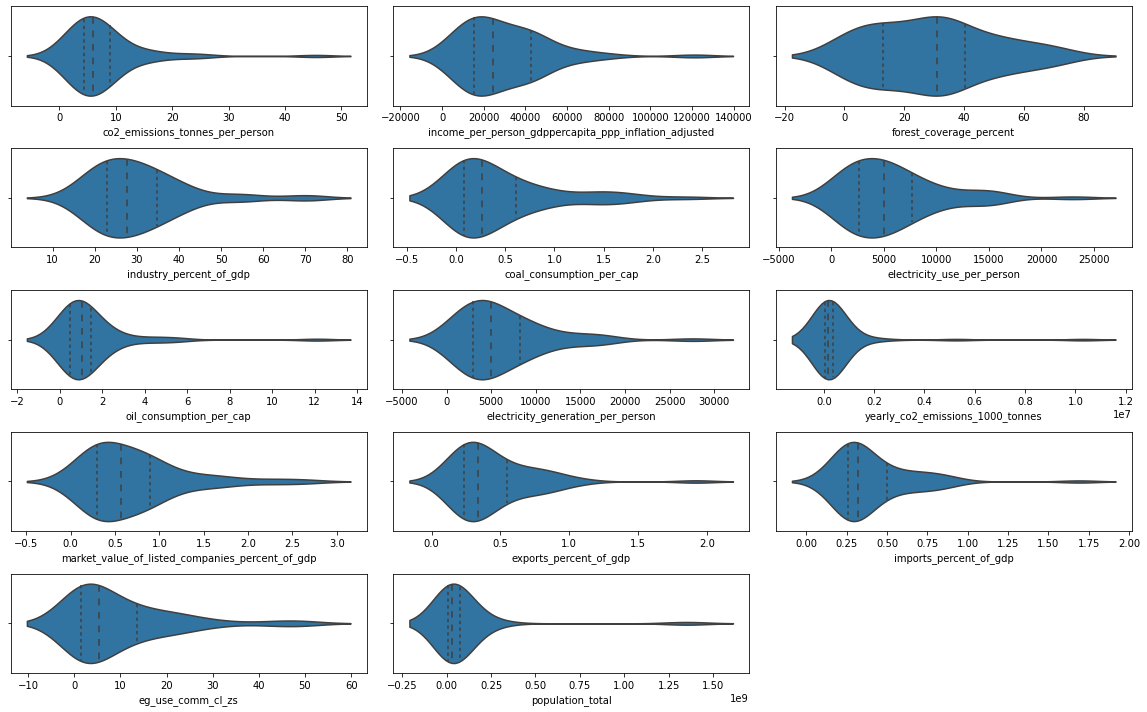

In [ ]:
column = list(emission.columns)
column.remove('geo') # since in geo feature do not have numerrical value remove it 
violin_plot(column,emission)

In [ ]:
emission.columns

Index(['geo', 'co2_emissions_tonnes_per_person',
       'income_per_person_gdppercapita_ppp_inflation_adjusted',
       'forest_coverage_percent', 'industry_percent_of_gdp',
       'coal_consumption_per_cap', 'electricity_use_per_person',
       'oil_consumption_per_cap', 'electricity_generation_per_person',
       'yearly_co2_emissions_1000_tonnes',
       'market_value_of_listed_companies_percent_of_gdp',
       'exports_percent_of_gdp', 'imports_percent_of_gdp', 'eg_use_comm_cl_zs',
       'population_total'],
      dtype='object')

**Observations**
- As we see most of the plots shown us that data are normally distributed with rightly skewed mostly of them excpet `forest_coverage_percent`.
- Out of skewed data features ;  
    - oil_consumption_per_cap
    - yearly_co2_emissions_1000_tonnes
    - exports_percent_of_gdp
    - imports_percent_of_gdp
    - population_total  

this features of total features needs attention for outliers; because most of the linear models are sensitive to outliers.

##### Box Plot

In [ ]:
# function to plot box plots
def box_plot(column:'list', dataframe:'dataframe'):
    plt.figure(figsize=(16,10))
    for index, val in enumerate(column):
        plt.subplot(5,3,index+1)
        plt.boxplot(dataframe[val], vert= False, showmeans= True, data = dataframe)
        plt.xlabel(val)
        
    plt.tight_layout()
    return plt.show()

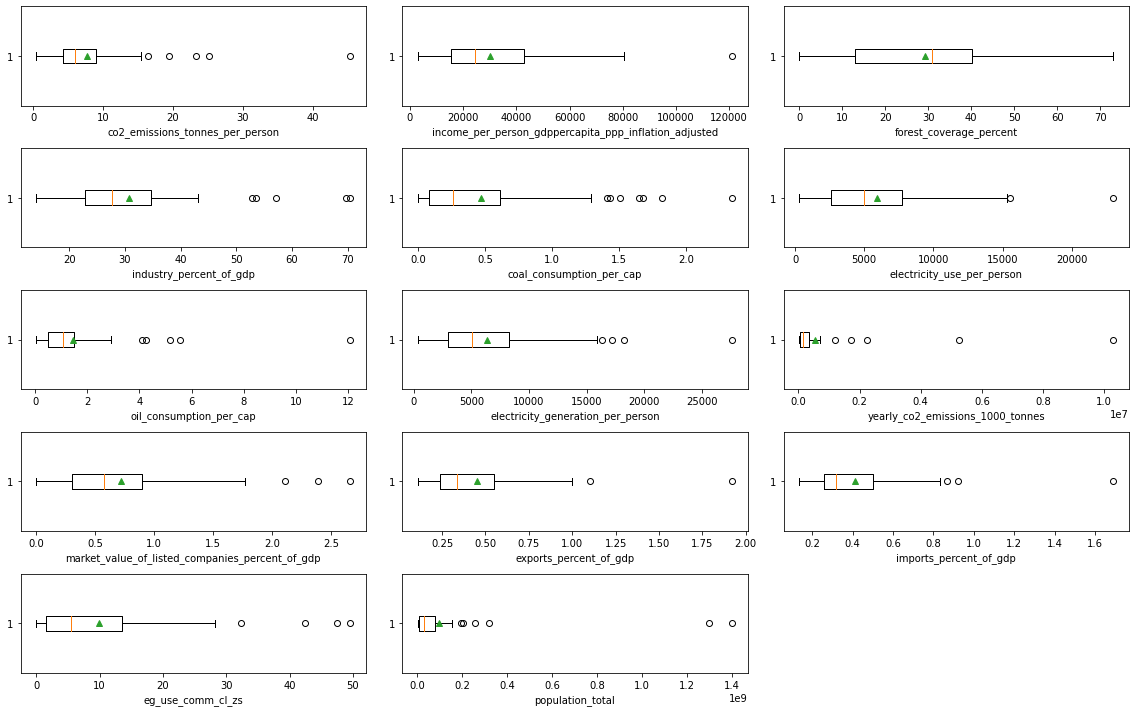

In [ ]:
column = list(emission.columns)
column.remove('geo')
box_plot(column, emission)

#### Bivariate Analysis

To do bivariate analysis most of the time we often choose distplot or scatter plot. Scatter plots might give glimpse of trend between two variables which we are plotted. 

##### Scatter Plot

In [ ]:
def plot_scatter(on_x:'list', on_y: 'varname', dataframe:'dataframe'):
    plt.figure(figsize=(25,20))
    for index, val in enumerate(on_x):
        plt.subplot(5,3,index+1)
        sns.scatterplot(x = dataframe[val], y= dataframe[on_y], data = dataframe)
        plt.ylabel(on_y)
        
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    return plt.show()

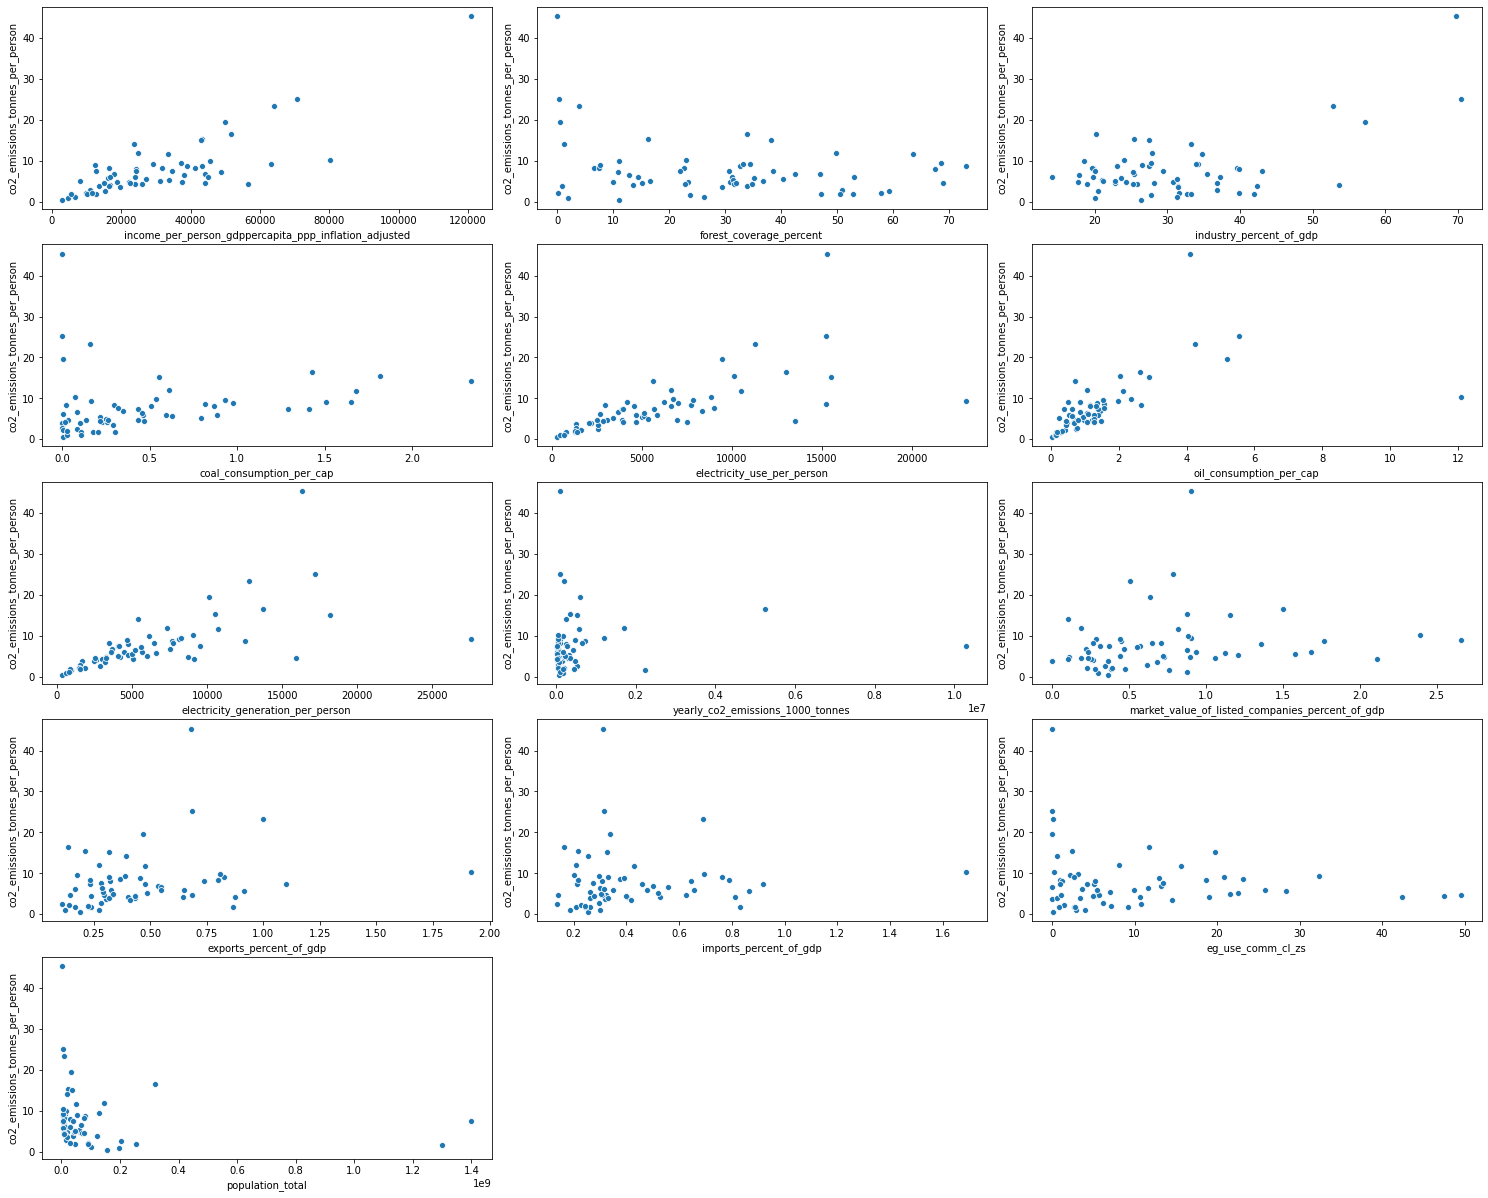

In [ ]:
column = list(emission.columns)

column.remove('geo')
column.remove('co2_emissions_tonnes_per_person') 
y = 'co2_emissions_tonnes_per_person'
plot_scatter(column, y,emission)

#### Outliers Treatment   
As we observed by boxplots there is outliers and we noted that outliers are too sensitive to the linear models. We need to handle them; one of the simplest method is drop that much amount from the feaures but it is not right choice cause our dataset is small so we should have to choose another way to handle them. Here we are using capping of outliers method to cap outliers.

In [ ]:
# check for different quantiles to check for sudden rise

emission.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.99,0.995])

,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,7.783361,30195.409836,29.303934,30.688525,0.469197,5908.327869,1.443149,6359.901639,5.281639e+05,0.714650,0.450820,0.413820,9.962165,9.499246e+07
std,7.060743,21172.571531,19.956345,11.639961,0.540885,4598.417466,1.803918,5130.952523,1.473971e+06,0.562190,0.308053,0.257976,11.666623,2.418230e+08
min,0.459000,2970.000000,0.000000,14.100000,0.000000,310.000000,0.036100,350.000000,3.070000e+04,0.000787,0.110000,0.137000,0.000000,2.460000e+06
10%,1.820000,9880.000000,1.970000,19.700000,0.004580,1310.000000,0.295000,1530.000000,4.210000e+04,0.219000,0.167000,0.209000,0.153000,5.460000e+06
25%,4.290000,15400.000000,12.900000,22.800000,0.083000,2600.000000,0.495000,3000.000000,6.170000e+04,0.301000,0.238000,0.260000,1.500000,9.510000e+06
50%,5.980000,24300.000000,30.800000,27.700000,0.262000,5000.000000,1.060000,5020.000000,1.670000e+05,0.573000,0.335000,0.319000,5.420000,3.010000e+07
75%,8.980000,42900.000000,40.300000,34.700000,0.609000,7710.000000,1.490000,8290.000000,3.610000e+05,0.895000,0.549000,0.501000,13.500000,7.720000e+07
90%,15.100000,51800.000000,57.900000,42.300000,1.410000,13000.000000,2.650000,12800.000000,6.490000e+05,1.500000,0.825000,0.762000,23.200000,1.550000e+08
95%,19.500000,64100.000000,67.500000,53.600000,1.650000,15200.000000,4.260000,16300.000000,1.710000e+06,1.764863,0.915000,0.831000,32.300000,2.550000e+08


In [ ]:
# creating a list of features to treat for outliers

features = ["co2_emissions_tonnes_per_person",
            "income_per_person_gdppercapita_ppp_inflation_adjusted",
            "coal_consumption_per_cap",
            "electricity_use_per_person",
            "oil_consumption_per_cap",
            "electricity_generation_per_person",
            "yearly_co2_emissions_1000_tonnes",
            "market_value_of_listed_companies_percent_of_gdp",
            "exports_percent_of_gdp",
            "imports_percent_of_gdp",
            "eg_use_comm_cl_zs",
            "population_total"]

In [ ]:
# cap the outliers to 99th percentile value
for i in features:
  q2 = emission[i].quantile(0.99)
  emission[i][emission[i]>q2]=q2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.p

In [ ]:
emission.describe()

,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,7.584672,29795.081967,29.303934,30.688525,0.464082,5834.557377,1.378723,6267.442623,4.784918e+05,0.711994,0.442754,0.406246,9.941509,9.400885e+07
std,6.088109,19599.460590,19.956345,11.639961,0.524114,4348.983742,1.453020,4780.690761,1.155916e+06,0.553158,0.273442,0.224494,11.596178,2.364896e+08
min,0.459000,2970.000000,0.000000,14.100000,0.000000,310.000000,0.036100,350.000000,3.070000e+04,0.000787,0.110000,0.137000,0.000000,2.460000e+06
25%,4.290000,15400.000000,12.900000,22.800000,0.083000,2600.000000,0.495000,3000.000000,6.170000e+04,0.301000,0.238000,0.260000,1.500000,9.510000e+06
50%,5.980000,24300.000000,30.800000,27.700000,0.262000,5000.000000,1.060000,5020.000000,1.670000e+05,0.573000,0.335000,0.319000,5.420000,3.010000e+07
75%,8.980000,42900.000000,40.300000,34.700000,0.609000,7710.000000,1.490000,8290.000000,3.610000e+05,0.895000,0.549000,0.501000,13.500000,7.720000e+07
max,33.280000,96580.000000,73.100000,70.500000,2.028000,18500.000000,8.170000,21960.000000,7.270000e+06,2.498000,1.428000,1.228000,48.340000,1.340000e+09


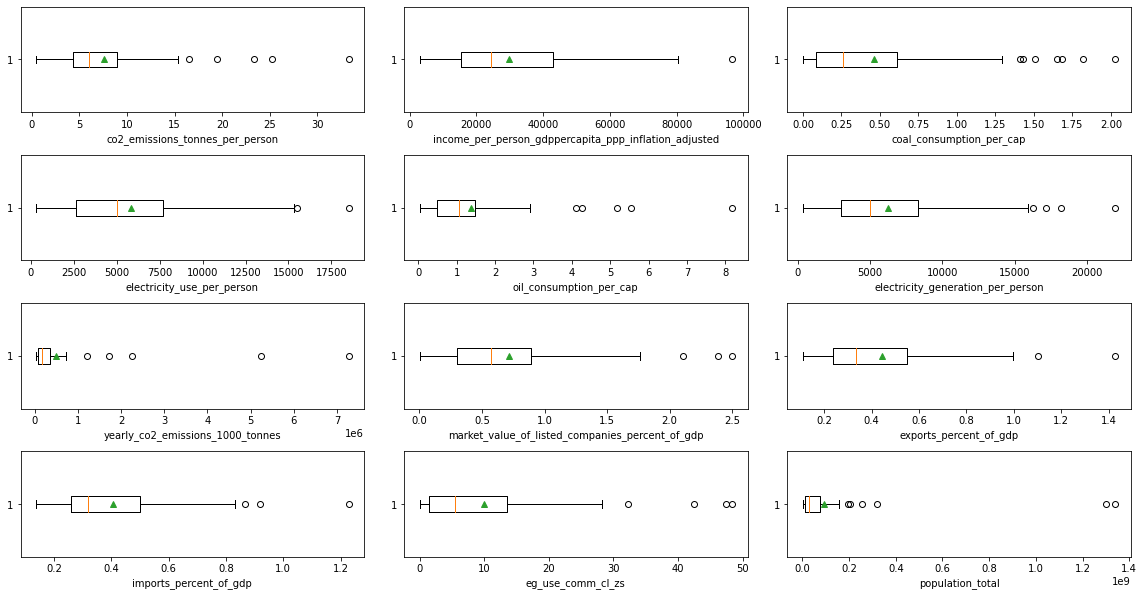

In [ ]:
# after capping the outliers
box_plot(features,emission)


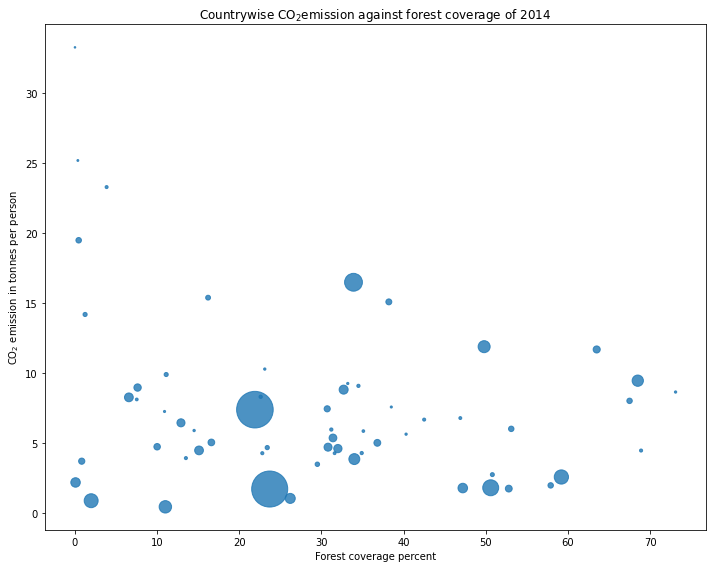

In [ ]:
size = emission['population_total']
plt.figure(figsize=(10,8))
plt.scatter(x = "forest_coverage_percent", y='co2_emissions_tonnes_per_person', s =size/1000000, alpha=0.8, data=emission)
plt.xlabel("Forest coverage percent")
plt.ylabel("CO$_{2}$ emission in tonnes per person")
plt.title("Countrywise CO$_{2}$emission against forest coverage of 2014")
plt.tight_layout()


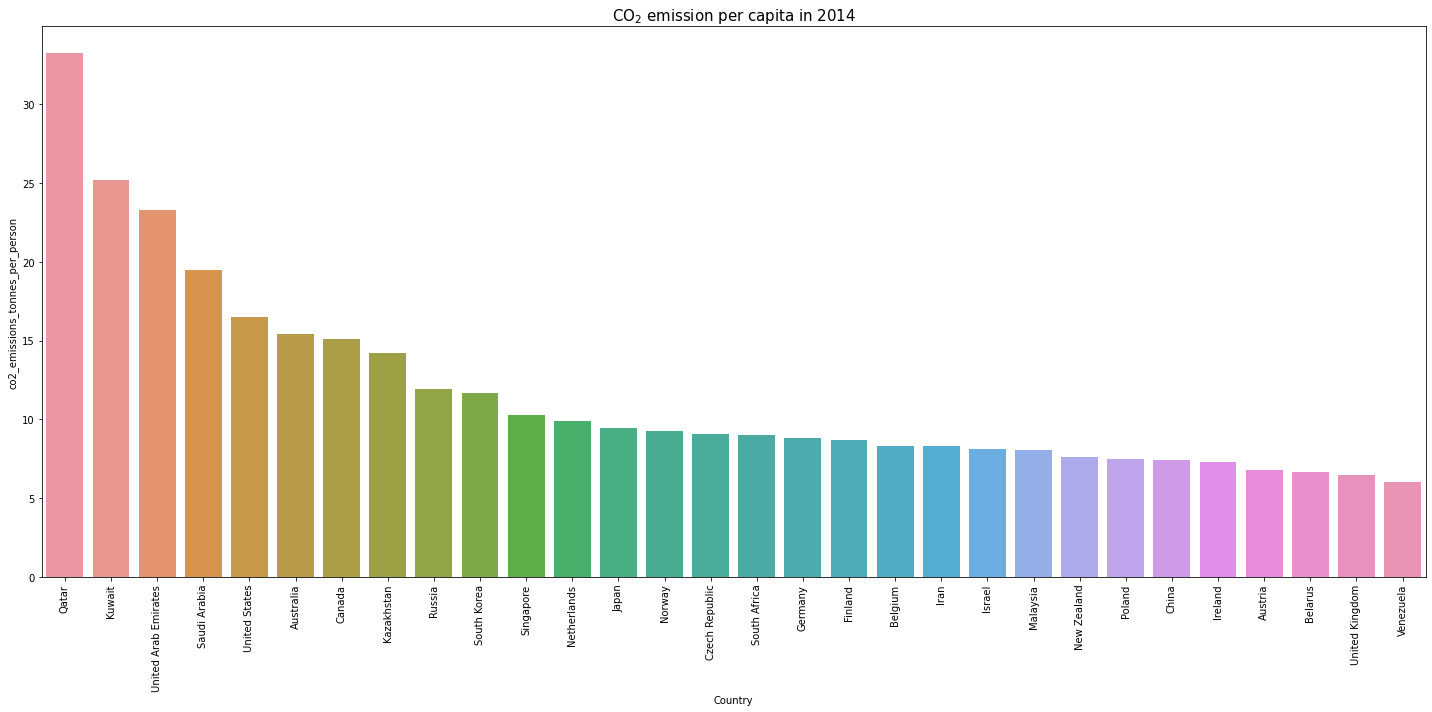

In [ ]:
# lets check for contribution of each country to the co2 emission per capita
# a countries which are contributing abvove median value of the co2_emissions_tonnes_per_person

co2_emission_contribute = emission[emission["co2_emissions_tonnes_per_person"] > emission["co2_emissions_tonnes_per_person"].median()]

plt.figure(figsize=(20,10))

sns.barplot(x="geo",y="co2_emissions_tonnes_per_person",
            order=co2_emission_contribute.sort_values("co2_emissions_tonnes_per_person", ascending=False).geo, 
            data=co2_emission_contribute,
            )
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.title("CO$_{2}$ emission per capita in 2014",fontdict={'size':15})
plt.tight_layout()

In [ ]:
emission.shape

(61, 15)

As you see `Qatar`, `Kuwait`,`UAE` and `Saudi Arabia`are top four countries which have most CO$_{2}$ emissions per capita for 2014. One thing which I want to mention here that is  top four countries which emit CO$_{2}$ are arabian countries. Lets check those countries average over remaining 57 countries dataset.

In [ ]:
arab_country = ['Qatar', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia']
arab_country_emission =  emission[emission['geo'].isin(arab_country)]
arab_country_emission


,geo,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
31,Kuwait,25.20,70800.0,0.35,70.5,0.00000,15200.0,5.55,17200.0,95400.0,0.788394,0.685,0.315,0.00000,3690000.0
42,Qatar,33.28,96580.0,0.00,69.8,0.00000,15300.0,4.10,16300.0,108000.0,0.901000,0.680,0.310,0.00000,2460000.0
45,Saudi Arabia,19.50,50000.0,0.45,57.2,0.00458,9440.0,5.19,10100.0,601000.0,0.639000,0.469,0.338,0.00004,30900000.0
56,United Arab Emirates,23.30,64100.0,3.85,52.8,0.16100,11300.0,4.26,12800.0,211000.0,0.509000,0.996,0.689,0.09690,9210000.0


In [ ]:
arab_country_emission['co2_emissions_tonnes_per_person'].mean()

25.319999999999993

In [ ]:
emission_country = emission.set_index('geo')
rest_countries = emission_country.drop(arab_country, axis=0)

In [ ]:
rest_countries['co2_emissions_tonnes_per_person'].mean()

6.340087719298245

As you can notice that in 2014 CO$_{2}$ emission per person for the `Qatar`, `Kuwait`,`UAE` and `Saudi Arabia` is 25.32 tonnes per person while rest 57 countries has 6.34 tonnes/person on average.  
That means in 2014 this 4 countries had emitted almost 4 times the rest of the 57 countries emission on average.

### Data Preprocessing 

In [ ]:
emission.describe()

,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,7.584672,29795.081967,29.303934,30.688525,0.464082,5834.557377,1.378723,6267.442623,4.784918e+05,0.711994,0.442754,0.406246,9.941509,9.400885e+07
std,6.088109,19599.460590,19.956345,11.639961,0.524114,4348.983742,1.453020,4780.690761,1.155916e+06,0.553158,0.273442,0.224494,11.596178,2.364896e+08
min,0.459000,2970.000000,0.000000,14.100000,0.000000,310.000000,0.036100,350.000000,3.070000e+04,0.000787,0.110000,0.137000,0.000000,2.460000e+06
25%,4.290000,15400.000000,12.900000,22.800000,0.083000,2600.000000,0.495000,3000.000000,6.170000e+04,0.301000,0.238000,0.260000,1.500000,9.510000e+06
50%,5.980000,24300.000000,30.800000,27.700000,0.262000,5000.000000,1.060000,5020.000000,1.670000e+05,0.573000,0.335000,0.319000,5.420000,3.010000e+07
75%,8.980000,42900.000000,40.300000,34.700000,0.609000,7710.000000,1.490000,8290.000000,3.610000e+05,0.895000,0.549000,0.501000,13.500000,7.720000e+07
max,33.280000,96580.000000,73.100000,70.500000,2.028000,18500.000000,8.170000,21960.000000,7.270000e+06,2.498000,1.428000,1.228000,48.340000,1.340000e+09


As you noticed each feature has different unit representation and values are differ by large values across features. So we need to bring them on the same scale. That's why we need pre-processing of data. 

#### Scale the Data

In [ ]:
# import required library to preprocess the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
 scaling_df= emission.drop(['geo'], axis=1)

In [ ]:
scaler = StandardScaler() # instantiation of scaler method

In [ ]:
scaled_df = scaler.fit_transform(scaling_df)

In [ ]:
column = emission.drop(['geo'], axis=1).columns
scaled_df = pd.DataFrame(scaled_df,columns=column)
scaled_df.describe()

,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
count,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
mean,1.092023e-16,-4.004083e-17,-1.310427e-16,1.260376e-16,6.916143e-17,2.912060e-17,7.644159e-17,-9.100189e-17,0.000000,3.130465e-16,-1.565232e-16,-3.567274e-16,-2.602654e-16,-3.989864e-17
std,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00,1.008299,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00
min,-1.180138e+00,-1.380023e+00,-1.480588e+00,-1.436963e+00,-8.928084e-01,-1.280852e+00,-9.316909e-01,-1.248052e+00,-0.390606,-1.296392e+00,-1.227008e+00,-1.209298e+00,-8.644238e-01,-3.903284e-01
25%,-5.456562e-01,-7.405584e-01,-8.288125e-01,-6.833348e-01,-7.331318e-01,-7.499225e-01,-6.132448e-01,-6.891387e-01,-0.363565,-7.491620e-01,-7.550166e-01,-6.568527e-01,-7.339974e-01,-3.602699e-01
50%,-2.657622e-01,-2.826958e-01,7.558906e-02,-2.588777e-01,-3.887688e-01,-1.934896e-01,-2.211725e-01,-2.630990e-01,-0.271713,-2.533587e-01,-3.973358e-01,-3.918585e-01,-3.931496e-01,-2.724822e-01
75%,2.310911e-01,6.741856e-01,5.555787e-01,3.474897e-01,2.787953e-01,4.348158e-01,7.721886e-02,4.265790e-01,-0.102487,3.335848e-01,3.917744e-01,4.255810e-01,3.094142e-01,-7.166635e-02
max,4.255602e+00,3.435766e+00,2.212806e+00,3.448625e+00,3.008690e+00,2.936445e+00,4.712694e+00,3.309728e+00,5.924196,3.255543e+00,3.633026e+00,3.690848e+00,3.338786e+00,5.312417e+00


#### Splitting data into X_train and y_train  
Since rule of thumb for test dataset size is atleast 100 observations; but we don't have 100 obseravtions in our total dataset. So we don't split it into test dataset.   
And another reason is that since our problem statment states that we need to find features which are most contributing to CO$_{2}$ emissions for 2014. 

In [ ]:
scaled_df.head()

,co2_emissions_tonnes_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,forest_coverage_percent,industry_percent_of_gdp,coal_consumption_per_cap,electricity_use_per_person,oil_consumption_per_cap,electricity_generation_per_person,yearly_co2_emissions_1000_tonnes,market_value_of_listed_companies_percent_of_gdp,exports_percent_of_gdp,imports_percent_of_gdp,eg_use_comm_cl_zs,population_total
0,-0.640058,-0.838304,-1.439157,1.005831,-0.883997,-1.037413,-0.643084,-0.975977,-0.290903,-1.296392,-0.519021,-0.391859,-0.861807,-0.234963
1,-0.469472,-0.565645,-0.975336,-0.553399,-0.826244,-0.645591,-0.450864,-0.627975,-0.239438,-1.090027,-1.101635,-1.195824,-0.386194,-0.219187
2,1.294357,0.699908,-0.662079,-0.458113,2.608536,0.988930,0.465822,0.892692,-0.102487,0.302597,-0.858265,-0.858967,-0.658350,-0.300196
3,-0.129956,0.735920,0.889045,-0.458113,-0.225244,0.585516,0.042522,0.268396,-0.366182,-0.898632,0.336463,0.425581,0.283329,-0.364065
4,-0.603622,-0.673680,-0.798497,1.984681,-0.892481,-0.842661,-0.631981,-0.773503,-0.384675,-0.805941,-0.035968,-0.647870,-0.814688,-0.360270


In [ ]:
X_train = scaled_df.drop("co2_emissions_tonnes_per_person", axis=1)
y_train = scaled_df["co2_emissions_tonnes_per_person"]

In [ ]:
X_train.shape

(61, 13)

In [ ]:
y_train.shape

(61,)

### Model Build

In [ ]:
# import required library 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold

###### Lasso Regression

In [ ]:
lasso_reg = Lasso(alpha=0.001, random_state= 42)

In [ ]:
lasso_reg.fit(X_train, y_train)
y_train_pred = lasso_reg.predict(X_train)

In [ ]:
r2_score(y_train, y_train_pred)

0.8931124707793751

In [ ]:
# lasso model parameters
model_parameters = list(lasso_reg.coef_)
model_parameters.insert(0, lasso_reg.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
features = X_train.columns
features = features.insert(0, "constant")
model_param = pd.DataFrame([features, model_parameters])

In [ ]:
model_param = model_param.T
model_param.columns = ['Features', 'parameter']
model_param.set_index('Features')

,parameter
Features,
constant,-0
income_per_person_gdppercapita_ppp_inflation_adjusted,0.271
forest_coverage_percent,-0.1
industry_percent_of_gdp,0.292
coal_consumption_per_cap,0.243
electricity_use_per_person,0.328
oil_consumption_per_cap,0.149
electricity_generation_per_person,0
yearly_co2_emissions_1000_tonnes,0.077


##### Hyperparameter Tuning of Lasso Regression

In [ ]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso(random_state=42)
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003100,0.000966,0.001803,0.001112,0.001,{'alpha': 0.001},0.494350,0.690560,0.737054,0.640655,0.105180,2,0.946172,0.922774,0.887910,0.918952,0.023938
1,0.002395,0.000338,0.000967,0.000039,0.01,{'alpha': 0.01},0.511643,0.728244,0.802000,0.680629,0.123227,1,0.941131,0.920462,0.872222,0.911272,0.028873
2,0.001963,0.000004,0.000947,0.000004,1,{'alpha': 1.0},-0.082206,-0.000236,-0.038755,-0.040399,0.033484,3,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001989,0.000045,0.000959,0.000009,5,{'alpha': 5.0},-0.082206,-0.000236,-0.038755,-0.040399,0.033484,3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002467,0.000201,0.001085,0.000172,10,{'alpha': 10.0},-0.082206,-0.000236,-0.038755,-0.040399,0.033484,3,0.000000,0.000000,0.000000,0.000000,0.000000


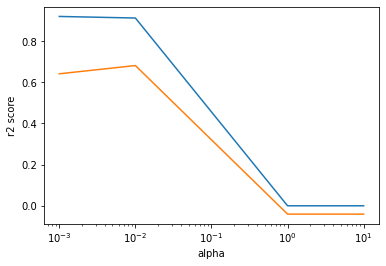

In [ ]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [ ]:
model_cv.best_params_

{'alpha': 0.01}

In [ ]:
model_cv.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
model_cv.best_score_

0.6806289211579332

In [ ]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.8900188612780613


Here we get $R^2$ score of 0.89 on training side with optimal model using `GridSearchCV`

In [ ]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
features = X_train.columns
features = features.insert(0, "constant")
model_param = pd.DataFrame([features, model_parameters])

Summary of the model parameters:

In [ ]:
model_param = model_param.T
model_param.columns = ['Features', 'parameter']
model_param.set_index('Features')

,parameter
Features,
constant,-0
income_per_person_gdppercapita_ppp_inflation_adjusted,0.325
forest_coverage_percent,-0.103
industry_percent_of_gdp,0.324
coal_consumption_per_cap,0.243
electricity_use_per_person,0.327
oil_consumption_per_cap,0.132
electricity_generation_per_person,0
yearly_co2_emissions_1000_tonnes,0.028


##### Collinearity Checking Using `VIF` for Optimal Model

In [ ]:
X_train = X_train.drop(['electricity_generation_per_person', 'exports_percent_of_gdp'], axis= 1)


Now lets check multi-collinearity between features. To check that we use  `variance_inflation_factor` from `statsmodels`.

In [ ]:
X_train.columns

Index(['income_per_person_gdppercapita_ppp_inflation_adjusted',
       'forest_coverage_percent', 'industry_percent_of_gdp',
       'coal_consumption_per_cap', 'electricity_use_per_person',
       'oil_consumption_per_cap', 'yearly_co2_emissions_1000_tonnes',
       'market_value_of_listed_companies_percent_of_gdp',
       'imports_percent_of_gdp', 'eg_use_comm_cl_zs', 'population_total'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking VIF
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,income_per_person_gdppercapita_ppp_inflation_a...,7.09
4,electricity_use_per_person,6.78
5,oil_consumption_per_cap,4.93
6,yearly_co2_emissions_1000_tonnes,3.51
10,population_total,3.19
9,eg_use_comm_cl_zs,2.29
3,coal_consumption_per_cap,1.82
8,imports_percent_of_gdp,1.64
2,industry_percent_of_gdp,1.54
7,market_value_of_listed_companies_percent_of_gdp,1.38


As general rule of thumb for optimal value of `VIF` should be less than 5. We can notice that top two are violating this norm so we can't rely on the parameter value significantly. We need to remove one by one from it and check again for vif .

In [ ]:
# drop the first feature and again tune the model and check for VIF
X_train = X_train.drop('income_per_person_gdppercapita_ppp_inflation_adjusted',axis=1)

In [ ]:
X_train.columns

Index(['forest_coverage_percent', 'industry_percent_of_gdp',
       'coal_consumption_per_cap', 'electricity_use_per_person',
       'oil_consumption_per_cap', 'yearly_co2_emissions_1000_tonnes',
       'market_value_of_listed_companies_percent_of_gdp',
       'imports_percent_of_gdp', 'eg_use_comm_cl_zs', 'population_total'],
      dtype='object')

In [ ]:
# using 3 folds 

folds = KFold(n_splits=3, shuffle=True, random_state=42)

params = {"alpha": [0.0001, 0.001,0.01,0.1,1.0,5.0,10.0]}

model = Lasso(random_state=42)

model_cv = GridSearchCV(estimator=model, param_grid = params, scoring="r2", 
                        cv=folds, n_jobs=-1, verbose=1, 
                        return_train_score=True,)

model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.5s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005356,0.001638,0.001688,0.000172,0.0001,{'alpha': 0.0001},0.490559,0.701319,0.757873,0.649917,0.115024,4,0.929454,0.898256,0.869866,0.899192,0.024336
1,0.003702,0.000051,0.001365,0.000058,0.001,{'alpha': 0.001},0.490949,0.704012,0.764164,0.653041,0.117218,3,0.929445,0.898240,0.869819,0.899168,0.024351
2,0.003645,0.000086,0.001395,0.000037,0.01,{'alpha': 0.01},0.493562,0.727791,0.803659,0.675004,0.131984,1,0.928531,0.897008,0.866014,0.897184,0.025523
3,0.003760,0.000077,0.001444,0.000048,0.1,{'alpha': 0.1},0.579224,0.687149,0.712155,0.659509,0.057681,2,0.891145,0.847733,0.778735,0.839204,0.046286
4,0.003670,0.000039,0.001405,0.000060,1,{'alpha': 1.0},-0.082206,-0.000236,-0.038755,-0.040399,0.033484,5,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
model_cv.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

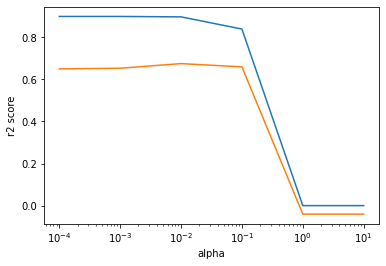

In [ ]:
# plotting 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [ ]:
model_cv.best_params_

{'alpha': 0.01}

In [ ]:
# build model using alpha = 0.01

lm = Lasso(alpha=0.01, random_state=42)
lm.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_train_pred = lm.predict(X_train)
r2_score(y_train, y_train_pred)

0.8745185983918033

In [ ]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
features = X_train.columns
features = features.insert(0, "constant")
model_param = pd.DataFrame([features, model_parameters])

In [ ]:
model_param = model_param.T
model_param.columns = ['Features', 'parameter']
model_param.set_index('Features')

,parameter
Features,
constant,-0
forest_coverage_percent,-0.148
industry_percent_of_gdp,0.32
coal_consumption_per_cap,0.209
electricity_use_per_person,0.524
oil_consumption_per_cap,0.239
yearly_co2_emissions_1000_tonnes,0.044
market_value_of_listed_companies_percent_of_gdp,-0.004
imports_percent_of_gdp,-0.031


In [ ]:
# checking VIF
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,electricity_use_per_person,4.19
4,oil_consumption_per_cap,4.17
5,yearly_co2_emissions_1000_tonnes,3.49
9,population_total,3.14
8,eg_use_comm_cl_zs,2.28
2,coal_consumption_per_cap,1.75
7,imports_percent_of_gdp,1.57
1,industry_percent_of_gdp,1.54
6,market_value_of_listed_companies_percent_of_gdp,1.36
0,forest_coverage_percent,1.23


Now all the features are under the assumed threshold value of `VIF` which is 5. So we can say that this model is optimal one.

### Validation of Linear models Assumptions

#### Normality Assumption: 
In this we do check whether or not error of the model is normaly distributed.  To visually check that we often plot qqplot of the residual.

In [ ]:
residual = y_train_pred - y_train

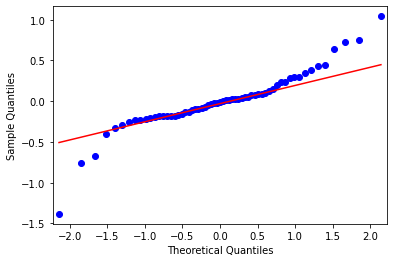

In [ ]:
import statsmodels.api as sm
# qq plot
sm.qqplot(residual,line="q")
plt.show()

Most of the residual values reside on the theoretical quantiles value so we can say that error are normally distributed with flat tail side on both side.

#### Independent Errors Assumptions  

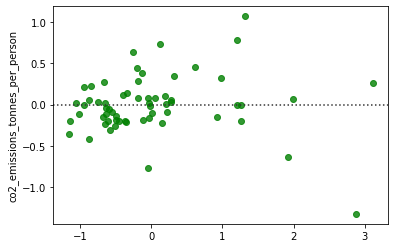

In [ ]:
sns.residplot(y_train_pred, residual, color="g")

We can't see any pattern in residual plot so:
- **Independence of error terms assumption validated**  

As well as variance also constant around the mean value. 
-  **Homoscedasticity i.e. constant variance assumption also validated.**

##### Auto-Correlation Assumption

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
from statsmodels.stats.stattools import durbin_watson
#quantitative method 
durbin_watson(residual)

1.800658475845045

Since as per rule of thumb of threshold value of the above test should not be greater than 2 for any autocorrelation.   
So **There is no auto-correlation.** 

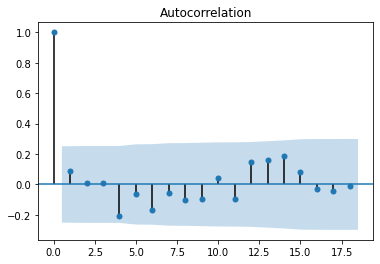

In [ ]:
plot_acf(residual,)
plt.show()

### Summary of the Project

In [ ]:
model_param.sort_values('parameter', ascending=False)

,Features,parameter
4,electricity_use_per_person,0.524
2,industry_percent_of_gdp,0.32
5,oil_consumption_per_cap,0.239
3,coal_consumption_per_cap,0.209
6,yearly_co2_emissions_1000_tonnes,0.044
0,constant,-0
7,market_value_of_listed_companies_percent_of_gdp,-0.004
8,imports_percent_of_gdp,-0.031
10,population_total,-0.079
9,eg_use_comm_cl_zs,-0.147


**A picture is worth a thousand words.**  


![World electricity production by Source ,2017](https://www.world-nuclear.org/getmedia/c907634e-4bb5-4a41-970e-40b8ec55c1a6/world-electricity-production.png.aspx)

As above image tells us that still we rely to attain our need of power on the source such as **Coal**, **Gas**.   
Our model also tries to show that top most four features which are contributing to CO$_{2}$ emission.   
Most Influential Features:
- Electricity use per capita 
- industry percent of gdp
- Oil cunsumption per capita
- Coal cunsupltion per capita 



- Also we can conclude that alternative and nuclear energy use and forest coverage percent help to reduce CO$_{2}$ emission because it is negatively influence model dependent variable.   
- So we should try to attain our power need through alternative energy resources such as renewable energy sources of which most of them are clean energy sources.   
- Also we know that forest are acts like **`Carbon Pool`**. We need to increase forest coverage percent of our total area which would helps us.